# *Bayesian A/B Testing and Conjugate Priors*

### Objectives: answer the following

 * What is a **prior distribution**, a **likelihood function**, and a **posterior distribution**?
 * What is a **conjugate prior**? 
 * How does this make Bayesian updating easier? How does this apply to **A/B testing**?
 * What are some key differences between frequentist and Bayesian A/B testing?

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats

# Review: frequentist p-values

*"The probability of observing data at least as extreme as the observation given the null hypothesis"*

How do we calculate this probability? Framing this in the most general terms, 
- we decide to measure some random variable $Y$
    - ($Y$ is often a sample statistic of some other random variable $X$)
- we decide on a hypothesis to test, such as "Y comes from a distribution with pdf $f_Y(y;\theta)$, where the value of parameter $\theta$ is $\theta_0$"
- we then sample from Y to get an observation, $y^*$
- we can then compute $P(Y \gt y^* \ |\  \theta = \theta_0)$

Broadly, we have a conditional probability (or probability density) 
$$P( \text{data} \ |\  \text{hypothesis} ) \rightarrow P( y^* |\  \theta_0 ) \rightarrow  f_Y(y^*;\theta_0) $$

Wouldn’t it be nice if, instead, we could give a probability of a ***hypothesis*** given the ***data***?

# Bayes' Theorem

Imagine we have a discrete set of hypotheses $\{H_i\}$
- e.g., $H_1: X \sim \text{Poisson}(2) \\ H_2: X \sim \text{Poisson}(5)$

Recall **Bayes' Theorem**

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

When we use it in the context of statistics, we talk about the probability that a hypothesis $H_i$ is true given some observed sample $x$.

$$P(H_i\ |\ x) = \frac{P(x\ |\ H_i) P(H_i)}{P(x)}$$

where

 * $P(H_i\ |\ x)$ is the **posterior probability distribution** of hypothesis $H_i$ being true, given observed data $x$
 * $P(x\ |\ H_i)$ is the probability of observing $x$ given $H_i$, also called the **likelihood**
 * $P(H_i)$ is the **prior distribution** of $H_i$, defined before we observe any data
 * $P(x)$, the **normalizing constant**, is

$$P(x) = \sum_{i} P(x\ |\ H_i) P(H_i)$$

<br> 

If we had a ***continuous*** family of hypotheses, such as $H(\theta): X \sim \text{Normal}(\theta,1),\  \theta \in \mathfrak{R}$, then we'd express Bayes' theorem in terms of probability ***densities*** instead:

$$f_{\theta|X}(\theta) = \frac{f_{X | \theta}(x) f_\theta(\theta)}{f_{X}(x)}$$

where

 * $f_{\theta|X}(\theta)$ is the **posterior probability distribution** of the parameter $\theta$ given observed data $x$
 * $f_{X | \theta}(x)$ is the probability density function of $X$ evaluated at $x$, given the parameter value $\theta$ 
  - also called the **likelihood** function $\mathcal{L}(\theta)$
 * $f_\theta(\theta)$ is the **prior probability distribution** of $\theta$, defined before we observe any data
 * $f_{X}(x)$, the **normalizing constant**, is

$$f_{X}(x) = \int_{-\infty}^{\infty} f_{X | \theta}(x) f_\theta(\theta) d\theta$$

<br>
##### What's the moral here?
## $$\text{posterior}(\theta) \propto \text{likelihood}(\theta; x)\times \text{prior}(\theta)$$

# Example: The Unknown Coin

Data is generated by the random variable $X$, which takes on the values 0 (tails) or 1 (heads)

$H: X \sim \text{Bernoulli}(p)$

This defines a *family* of hypotheses parametrized by $p$, the "fairness" of the coin.

...

*see `coin_example` notebook*

# Click-through rates (CTR)

Say we have a website. When a user visits the home page, they either click `Buy now!` or they leave. We can think of each user as a draw from the same Bernoulli distribution: there's a probability $p$ that they click `Buy now!`. 

Our site goes live, we collect data on how many people viewed the site and how many clicked through. How can we get a probabilistic estimate of the parameter $p$ that defines this stochastic process?

Well heck, this is identical to the coin example above. Let's work with this from now on.

### $$\text{posterior}(p) \propto \text{likelihood}(p; x)\times \text{prior}(p)$$

- Our goal is to find an analytical form for the posterior probability distribution over $p$
- To do so, we’re going to model each of these terms with an appropriate distribution. 
- We’ll see that it makes Bayesian updating easy and fun! 

## Likelihood: what generated our data?

Say we collected data from $n$ users and $k$ of them clicked through.

Let our random variable $X$ be **the number of successes in $n$ trials**. Then our data produced a single draw from a binomial distribution
$$ \begin{align} P(X=k\ |\ p, n) &= {n \choose k} p^k (1-p)^{n-k}  \\&= \mathcal{L}(p) \end{align}$$


### $$\text{posterior}(p) \propto \color{blue}{\text{binomial}(k;p,n)}\times \text{prior}(p)$$


## Prior: hmm...

- We want to pick a distribution for $p$, so it must be defined over $[0,1]$. But that's pretty much our only constraint.
- We could come up with any arbitrary probability distribution, call it our prior, and be done. But remember, this Bayesian updating business is computationally expensive. If there's a particular form for the prior distribution that makes ***Bayesian updating trivially simple***, without having to evaluate a complicated function, we want to use it.

#### Let's look at the binomial distribution again
$$ P(k\ |\ p, n) = {n \choose k} p^k (1-p)^{n-k} $$

Can we make a probability distribution over $p$ that has the same form?

$$ \text{the_moses_distribution}(p; a, b) \sim p^a (1-p)^b $$

Oh someone already came up with this: the [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution)

$$ \text{Beta}(p; \alpha, \beta): \ f_p(p) = \frac{p^{\alpha - 1}(1-p)^{\beta - 1}}{\text{B}(\alpha, \beta)}  $$

$\alpha$ and $\beta$ are the parameters of the beta distribution. How do they define the shape of the pdf?

$ \text{E}[p] = \frac{\alpha}{\alpha + \beta}$ ; $ \text{Mode} = \frac{\alpha - 1}{\alpha + \beta - 2}$

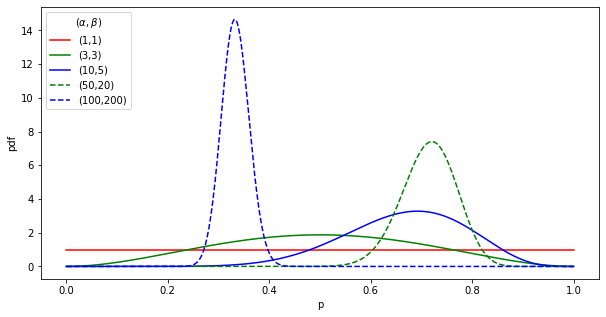

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(0,1,1000)
for (a,b,s) in [(1,1,"r-"), (3,3,"g-"), (10,5,"b-"), 
                (50,20,"g--"), (100,200,"b--")]:
        ax.plot(x,
                stats.beta(a,b).pdf(x),
                s,
                label="({0},{1})".format(a,b))
ax.legend(title=r"($\alpha,\beta$)", loc="upper left")
ax.set_xlabel("p")
ax.set_ylabel("pdf");

note that $\alpha = 1, \beta = 1$ is the $\text{uniform}(0,1)$ distribution

also note that $\alpha \gt \beta$ means that the peak of the pdf is at some $p > 0.5$

### why pick this form of the prior? let's see what the posterior looks like with this choice

### $$\text{posterior}(p) \propto \color{blue}{\text{binomial}(k; p,n)}\times \color{brown}{\text{beta}(p; \alpha, \beta)}$$

$$\begin{aligned}
posterior &\propto likelihood \times prior \\
&\propto binomia(p;x) \times beta(p; \alpha, \beta) \\
&= {n \choose k} p^k (1-p)^{n-k} \times \frac{p^{\alpha - 1}(1 - p)^{\beta - 1}}{B(\alpha, \beta)} \\
&\propto p^{\alpha - 1}(1 - p)^{\beta - 1}  p^k (1-p)^{n-k} \\
&\propto p^{\alpha + k - 1}(1 - p)^{\beta + n - k - 1} \\
&\propto beta(p; \alpha + k, \beta + n-k)
\end{aligned}$$

If the prior is a beta distribution with parameters $\alpha$ and $\beta$, then the posterior is a beta distribution with parameters $\alpha+k$ and $\beta+n-k$ 

This means we don't need to do any computation beyond two simple additions in order to know the exact form of the posterior probability distribution of $p$. Cool, right??


### $$\color{brown}{\text{beta}(p; \alpha + k, \beta + n-k)} \propto \color{blue}{\text{binomial}(k; p,n)}\times \color{brown}{\text{beta}(p; \alpha, \beta)}$$

## Conjugate priors

This relationship ("for a given likelihood function, you can pick a family of distributions for the prior such that the posterior belongs to the same family") is called **conjugacy**.

A conjugate prior for a likelihood is a class of functions such that if the prior is in the class, so is the posterior. There are [many listed in Wikipedia](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions).

Likelihood                 | Conjugate Prior
---------------------------|------------
Bernoulli/Binomial         | Beta distribution
Normal with known $\sigma$ | Normal distribution
Poisson                    | Gamma
Uniform                    | Pareto


## Put it together: clicking 

I took my data: $n$ users (trials), $k$ click-throughs (successes).

In order to get a posterior probability distribution over possible values of $p$, I have to pick a prior distribution: before taking data, how would I distribute probabilities over possible values of $p$?

"Uniformly" seems a good enough answer for me, and in terms of the beta distribution, that corresponds to $\alpha = 1, \beta = 1$. 

prior pdf: $f_p(p) = \text{beta}(1,1)$

Now according to the update rule we derived above, the posterior is also a beta distribution with parameters

$$ \alpha = 1 + k = 1 + \text{(# of successes)} \\ \beta = 1 + n - k = 1 + \text{(# of failures)}$$

### example: 24 trials and 3 successes

In [4]:
n = 24
k = 3
posterior = stats.distributions.beta(a = 1 + k, b = 1 + n - k)

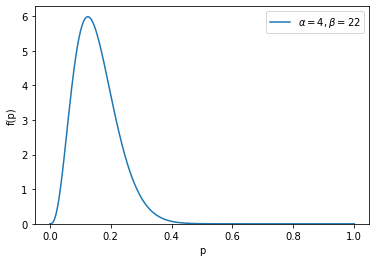

In [5]:
x = np.linspace(0,1,1000)
plt.plot(x, posterior.pdf(x), label=r"$\alpha={},\beta={}$".format(1 + k, 1 + n - k))
plt.legend()
plt.xlabel('p')
plt.ylabel('f(p)')
plt.ylim(ymin=0);

How can we use this to answer the following questions:
- what is $P(p < 0.15\ |\  \text{data})$?
- what values of $p$ bound the central 95% of this distribution?

In [6]:
posterior.cdf(0.15)

0.5288787233077632

In [7]:
posterior.ppf(0.529)

0.15002155646992088

In [8]:
posterior.ppf(0.025)

0.04537945237170959

In [9]:
posterior.ppf(0.975)

0.3121903072862354

## A/B testing
Say we have two versions of our site and we want to know which has a higher click-through rate. How can we use Bayesian updating & the beta distribution for this?

We collect data for each version of the site: how many successes and failures we get for each. Suppose it's something like:

In [10]:
views_a = 2706
clicks_a = 166
failures_a = views_a - clicks_a

views_b = 2294
clicks_b = 162
failures_b = views_b - clicks_b

As before, we assume a uniform prior for the CTR for each version, then plot the posteriors.

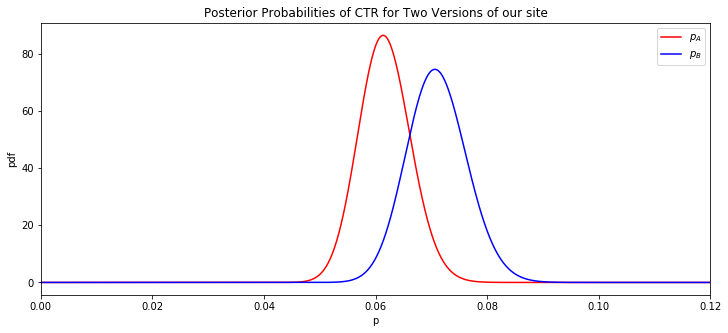

In [11]:
fig, ax = plt.subplots(figsize=(12,5))
x = np.linspace(0,1,10000)
for (a,b,s, label) in [(1 + clicks_a, 1 + failures_a,"r", "$p_A$"),
                       (1 + clicks_b, 1 + failures_b,"b", "$p_B$")]:
        ax.plot(x,
                stats.beta(a,b).pdf(x),
                s,
                label=label)
ax.legend(loc="upper right")
ax.set_xlabel("p")
ax.set_ylabel("pdf")
ax.set_xlim(0, 0.12)
ax.set_title("Posterior Probabilities of CTR for Two Versions of our site");

### "what is the probability that site B is better than site A?"

What is this question really asking? This whole process has been treating $p_A$ and $p_B$ as random variables whose distributions we have derived. What does it mean to ask if one random variable is larger than another?

#### simulation-based answer

In [12]:
# here are our posteriors
beta_a = stats.beta(1+clicks_a, 1+failures_a)
beta_b = stats.beta(1+clicks_b, 1+failures_b)

In [13]:
# now sample from each posterior, oh, 100000 times
samp_a = beta_a.rvs(size=100000)
samp_b = beta_b.rvs(size=100000)

In [14]:
# treat these as paired samples 
# (since they're all independent draws)
# What is the probability that the draw from beta_b 
#  is greater than the draw from beta_a?

(samp_b > samp_a).mean()

0.90593

In [15]:
samp_b > samp_a

array([ True,  True,  True, ...,  True,  True,  True])

We can ask all kinds of questions, like "what is the probability that $p_B$ is at least one percentage point higher than $p_A$?"

In [16]:
(samp_b > (samp_a + 0.01)).mean()

0.4608

# Frequentist vs. Bayesian

In both cases, we consider an ensemble of possible randomly generated universes.

Frequentist: The parameters of the data-generating process are a fixed (though unknown) reality; the observed data follows some distribution defined by those parameters.

Bayesian: The observed data is a fixed reality; our estimate of the parameters follow some random distribution.

## Frequentist A/B testing

Frequentist procedure

* Choose n (number of experiments/samples) based on expected size of effect.
* Run **all** experiments and observe the data.
* The significance is the probability of getting the result (or more extreme) assuming no effect (null hypothesis distribution).
* Doesn't tell you how likely it is that a is better than b.

## Bayesian A/B testing

Bayesian procedure

* No need to choose n beforehand.
* Update knowledge as the experiment runs.
* Gives probability of *anything you want*.

Why doesn't everyone like this better?